# Brightness temperature and backscatter of a three-layer snow scenario (DMRT-QMS)

In [1]:
import datetime
import numpy as np
!pip install https://rshub.zju.edu.cn/projects/rstool-0.1.5.tar.gz -q

In [2]:
# Define user token
token = 'ENTER YOUR TOKEN HERE' # Register your account to get a token
# Change your task name or project name every time you run a new job
project_name = 'Snow Demo1'
task_name1 = 'DMRT-QMS Active'
task_name2 = 'DMRT-QMS Passive'

In [3]:
# ============== CHANGE YOUR INPUT PARAMETERS HERE ==============
# ====== Parameters not define will be set to default values ======
# Step 1: Define Scenario flag
# 1: Bare soil
# 2: Snow
# 3: Vegetation covered soil
scenario_flag = 2

# Step 2: Define observation description
# 1) Observation mode
# 1: Active (Backscatter)
# 2: Passive (Brightness temperature)
output_var1 = 1
output_var2 = 2

# 2) Observation characteristics
fGHz = [1.41, 6.925, 10.65]

# angle=[30, 40, 50] # Incident Angle
angle = np.arange(0,70,5)
angle = angle.tolist()


# Step 3: Define Algorithm flag
# 1: DMRT-QMS; 2: DMRT-BIC
algorithm = 1

# Step 4: Describe your scenario (Demo shows 3-layer snow)
depth=[30,20,7,18] # [cm]
rho=[0.111,0.224,0.189,0.216] # [gmcc]
dia=[0.5,1.0,2.0,3.0] # Grain size diameter [mm]
tau=[0.1,0.1,0.1,0.1] # stickness #
Tsnow=[260,260,260,260] # Snow temperature [K]

Tg=270 # Ground Temperature [K]
mv=0.2 # soil moisture
clayfrac=0.3 #clay fraction

# Passive parameters to calculate surface backscattering
rough_model = 1 # option 1: Q/H model; option 2: Wegmuller and Matzler 1999 model
rough_Q = 0.5  # polarization mixing factor, unitless          
rough_H = 0.5 # roughness height factor, unitless # Q = H = 0, means flat bottom surface     

surf_model_setting_passive=[rough_model,rough_Q,rough_H] #'OH'

# Active parameters to calculate surface backscattering
rough_model = 3    # option 1: 'NMM3D'; option 2: 'SPM3D'; option 3: 'OH'
rough_rms = 0.25 # rough ground rms height, (cm) rms == 0 assumes flat bottom boundary
rough_ratio = 7  # correlation length / rms height

surf_model_setting_active=[rough_model,rough_rms,rough_ratio] #'OH'

In [4]:
# Input data for Active DMRT-QMS model
data1 = {
    'scenario_flag': scenario_flag, 
    'output_var': output_var1,'fGHz': fGHz,
    'angle':angle,
    'algorithm':algorithm,
    'depth': depth,'rho':rho,'dia':dia,'tau':tau,'Tsnow':Tsnow,'Tg':Tg,
    'mv':mv,'clayfrac':clayfrac,'surf_model_setting':surf_model_setting_active,
    'project_name':project_name,
    'task_name':task_name1,
    'token':'6uf0z22#$m!!0095xo**1vy1s*04k!',
    'level_required':1
}

# Input data for Passive DMRT-QMS model
data2 = {
    'scenario_flag': scenario_flag, 
    'output_var': output_var2,'fGHz': fGHz,
    'angle':angle,
    'algorithm':algorithm,
    'depth': depth,'rho':rho,'dia':dia,'tau':tau,'Tsnow':Tsnow,'Tg':Tg,
    'mv':mv,'clayfrac':clayfrac,'surf_model_setting':surf_model_setting_passive,
    'project_name':project_name,
    'task_name':task_name2,
    'token':'6uf0z22#$m!!0095xo**1vy1s*04k!',
    'level_required':1
}

## Run models

In [5]:
from rstool import submit_jobs
result1=submit_jobs.run(data1)
result2=submit_jobs.run(data2)

{"scenario_flag": 2, "output_var": 1, "fGHz": [1.41, 6.925, 10.65], "angle": [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75], "algorithm": 1, "depth": [30, 20, 7, 18], "rho": [0.111, 0.224, 0.189, 0.216], "dia": [0.5, 1.0, 2.0, 3.0], "tau": [0.1, 0.1, 0.1, 0.1], "Tsnow": [260, 260, 260, 260], "Tg": 270, "mv": 0.2, "clayfrac": 0.3, "surf_model_setting": [3, 0.25, 7], "project_name": "Snow Demo t3", "task_name": "Demo 1 Active t20", "token": "6uf0z22#$m!!0095xo**1vy1s*04k!", "level_required": 1}
{"scenario_flag": 2, "output_var": 2, "fGHz": [1.41, 6.925, 10.65], "angle": [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75], "algorithm": 1, "depth": [30, 20, 7, 18], "rho": [0.111, 0.224, 0.189, 0.216], "dia": [0.5, 1.0, 2.0, 3.0], "tau": [0.1, 0.1, 0.1, 0.1], "Tsnow": [260, 260, 260, 260], "Tg": 270, "mv": 0.2, "clayfrac": 0.3, "surf_model_setting": [1, 0.5, 0.5], "project_name": "Snow Demo t3", "task_name": "Demo 2 Passive t20", "token": "6uf0z22#$m!!0095xo**1vy1

In [6]:
# Store log information
now = datetime.datetime.now()
logname = 'log_' + now.strftime("%Y%m%d%H%M%D") + '.txt'
f = open('log.txt',"a")
head_string = '======' + now.strftime("%Y%m%d%H%M%D") + '======' + "\n"
f.write(head_string)
f.write(f' project_name = {project_name} \n')
f.write(f' task_name = {task_name1} \n')
f.write(f' data = {data1} \n')
f.write(f' task_name = {task_name2} \n')
f.write(f' data = {data2} \n')
f.write('================================ \n')
f.close()

# Check status of code (It may take a long time, especially for active model!)

In [7]:
from rstool import submit_jobs
result=submit_jobs.check_completion(token, project_name, task_name2)
print(result)

{'result': 'Jobs are still running, please wait...'}


# Post Process

In [8]:
from rstool.load_file import load_file

In [10]:
# load mat file with project id, frequencies,variables to load
data2 = load_file(token, project_name, task_name2,'6.925')

TB_v=[]
TB_h=[]
for i,inc_ang in enumerate(angle):
    data_active = data2.load_snow_TB(inc_ang)
    # Read variables into python

    TB_v.append(data_active['Tb_v0'][:,0]) # vertical Tbs
    TB_h.append(data_active['Tb_h0'][:,0]) # horizontal Tbs
theta_obs = angle # incident angle

In [11]:
# load mat file with project id, frequencies,variables to load
data1 = load_file(token, project_name, task_name1,'1.41')
backscatter_vv=[]
backscatter_vh=[]
for i,inc_ang in enumerate(angle):
    data_active = data1.load_snow_bc(inc_ang)
    # Read variables into python

    backscatter_vv.append(data_active['vvdb'][:,0]) # VV backscatters
    backscatter_vh.append(data_active['vhdb'][:,0]) # VH backscatters
theta_obs = angle # incident angle

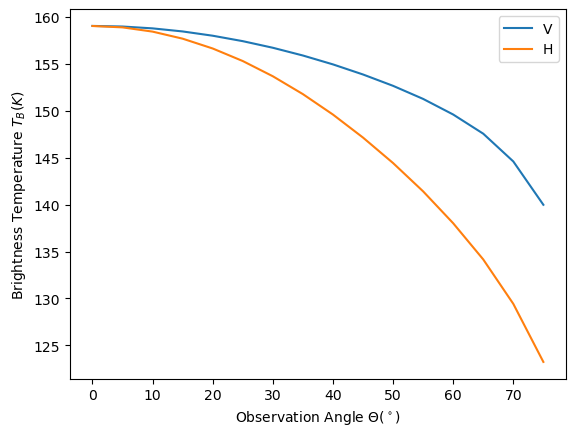

In [12]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(theta_obs, TB_v, color='tab:blue')
ax.plot(theta_obs, TB_h, color='tab:orange')
ax.set(xlabel='Observation Angle $\Theta(^\circ)$', ylabel='Brightness Temperature $T_B(K)$')
ax.legend(['V', 'H'])

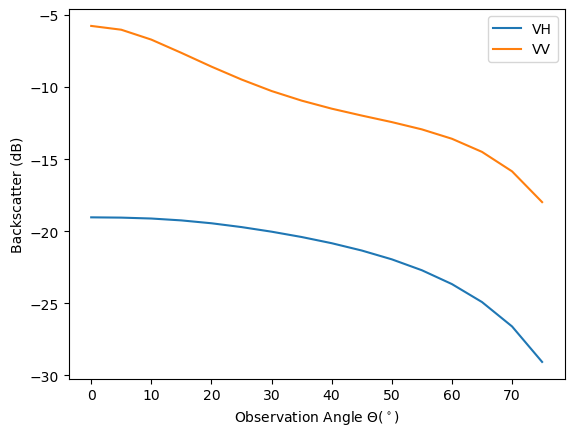

In [13]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(theta_obs, backscatter_vh, color='tab:blue')
ax.plot(theta_obs, backscatter_vv, color='tab:orange')
ax.set(xlabel='Observation Angle $\Theta(^\circ)$', ylabel='Backscatter (dB)')
ax.legend(['VH', 'VV'])